In [1]:
import numpy as np

## Dataset

In [2]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=50, n_features=2, n_redundant=0, n_clusters_per_class=1, flip_y=0, class_sep=3, random_state=20)

### Number of samples in the dataset

In [3]:
X.shape[0]

50

### Number of features in the dataset

In [4]:
X.shape[1]

2

In [5]:
y

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0])

### Replacing all the 0 entries in the target vector to -1

In [6]:
y[ y == 0 ]  = -1

In [7]:
y

array([ 1,  1,  1,  1,  1,  1,  1, -1, -1,  1, -1, -1, -1,  1, -1, -1,  1,
        1, -1,  1, -1,  1, -1, -1,  1, -1,  1, -1,  1,  1, -1,  1, -1,  1,
       -1,  1,  1, -1, -1, -1, -1,  1,  1, -1, -1, -1, -1,  1,  1, -1])

### Number of unique classes in the target vector

In [8]:
np.unique(y)

array([-1,  1])

### Plot the data keeping first feature on the x-axis and the second feature on the y-axis. Plot the data points belonging to each class in different colors. Does the data seem linearly separable?

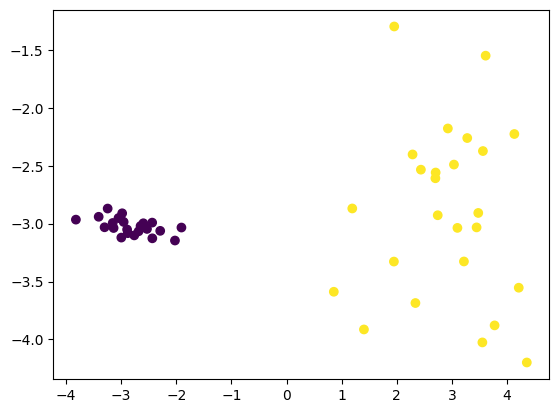

In [9]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c = y);

### Initialize w to be a zero vector, with shape equal to the number of features in the data.

In [10]:
w = np.zeros(X.shape[1])
w

array([0., 0.])

Iterate over each data point in $X$ one by one (in the same sequence as present in $X$). For each data point, compute the value of $w^Tx$. If
$w^T\ge0$, predict positive class for a, else predict the negative class.

In [11]:
w = np.zeros(X.shape[1])
total_mistakes = 0

for i in range(len(X)):
  y_pred = 1 if w.T@X[i] >= 0 else -1

  if y_pred != y[i]:
    w = w + X[i]*y[i]
    total_mistakes += 1

print(total_mistakes)

2


### So far, we have run only one iteration over the entire data. Run the same for 10 epochs (iterations), but stop if there are no weight updates in an epoch.

In [12]:
w = np.zeros(X.shape[1])
total_mistakes = 0
epochs = 10
weight_updates_per_epoch = {}

for epoch in range(epochs):
  weight_updates_per_epoch[epoch] = 0
  for i in range(len(X)):
    y_pred = 1 if w.T@X[i] >= 0 else -1

    if y_pred != y[i]:
      w = w + X[i]*y[i]
      weight_updates_per_epoch[epoch] += 1
      total_mistakes += 1
  if weight_updates_per_epoch[epoch] == 0:
    break

print(weight_updates_per_epoch)
print(total_mistakes)
print(w)

{0: 2, 1: 0}
2
[ 6.08372134 -0.97979197]


### Plot the vector w and draw the decision boundary thus obtained

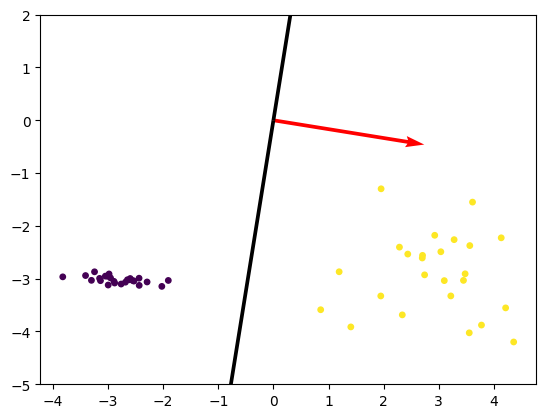

In [13]:
plt.scatter(X[:, 0], X[:, 1], c = y, s = 15)
plt.quiver(0, 0, w[0], w[1], scale=20, color = 'red')
plt.quiver(0, 0, -w[1], w[0], scale=15, headaxislength=0, headlength=0)
plt.quiver(0, 0, w[1], -w[0], scale=10, headaxislength=0, headlength=0)
plt.ylim(-5, 2);

### The value of loss function obtained using the weight vector

In [14]:
loss = 0
for i in range(len(X)):
  y_pred = 1 if w.T@X[i] >= 0 else -1
  if y_pred!=y[i]:
    loss += 1

loss

0